In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import time

In [2]:
mpl.rcParams['font.family'] = 'Microsoft YaHei'
start_time = time.perf_counter()

In [3]:
train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

#丢掉无关的属性
train = train.drop(columns=['id', 'CustomerId', 'Surname'])

In [4]:
#数据处理
#先从原始train数据中划分训练集和测试集
train, test0 = train_test_split(train, test_size=0.2, random_state=1)
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
90879,822,Spain,Male,37.0,8,0.00,2,1.0,1.0,169038.02,0
24401,535,France,Male,37.0,5,0.00,2,1.0,1.0,140883.91,0
151368,817,France,Male,25.0,2,89994.71,1,1.0,0.0,159654.00,0
49205,577,Spain,Male,43.0,8,0.00,2,1.0,0.0,171060.01,0
117254,598,France,Female,35.0,3,0.00,2,1.0,1.0,59297.34,0
...,...,...,...,...,...,...,...,...,...,...,...
73349,626,France,Female,37.0,4,0.00,1,1.0,0.0,176712.59,0
109259,711,Germany,Female,28.0,7,150329.15,2,0.0,0.0,141533.19,0
50057,681,Spain,Male,48.0,7,142905.51,1,1.0,1.0,163581.67,0
5192,444,France,Female,36.0,7,0.00,1,0.0,1.0,138743.86,1


In [5]:
#数据预处理
#分类特征和数值特征
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
#缺失值填补
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessed_train = preprocessor.fit_transform(train)
preprocessed_test0 = preprocessor.fit_transform(test0)

#将预处理后的数据转换为 DataFrame
num_features_names = numerical_features
cat_features_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features_names = np.concatenate([num_features_names, cat_features_names])
preprocessed_train_df = pd.DataFrame(preprocessed_train, columns=all_features_names)
preprocessed_test0_df = pd.DataFrame(preprocessed_test0, columns=all_features_names)
preprocessed_train_df['Exited'] = train['Exited'].values
preprocessed_test0_df['Exited'] = test0['Exited'].values

#查看数据结构
preprocessed_train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,2.067045,-0.128462,1.062065,-0.883564,0.812788,0.570811,1.004365,1.123215,0.0,0.0,1.0,0.0,1.0,0
1,-1.513526,-0.128462,-0.006138,-0.883564,0.812788,0.570811,1.004365,0.564206,1.0,0.0,0.0,0.0,1.0,0
2,2.004665,-1.478287,-1.074341,0.548947,-1.013609,0.570811,-0.995654,0.936892,1.0,0.0,0.0,0.0,1.0,0
3,-0.989540,0.546451,1.062065,-0.883564,0.812788,0.570811,-0.995654,1.163362,0.0,0.0,1.0,0.0,1.0,0
4,-0.727547,-0.353433,-0.718273,-0.883564,0.812788,0.570811,1.004365,-1.055723,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132022,-0.378223,-0.128462,-0.362206,-0.883564,-1.013609,0.570811,-0.995654,1.275596,1.0,0.0,0.0,1.0,0.0,0
132023,0.682225,-1.140831,0.705997,1.509334,0.812788,-1.751893,-0.995654,0.577097,0.0,1.0,0.0,1.0,0.0,0
132024,0.307949,1.108878,0.705997,1.391166,-1.013609,0.570811,1.004365,1.014877,0.0,0.0,1.0,0.0,1.0,0
132025,-2.648829,-0.240947,0.705997,-0.883564,-1.013609,-1.751893,1.004365,0.521714,1.0,0.0,0.0,1.0,0.0,1


In [6]:
#变量分组
train_x = preprocessed_train_df.drop(columns=['Exited'])
train_y = preprocessed_train_df['Exited']
test0_x = preprocessed_test0_df.drop(columns=['Exited'])
test0_y = preprocessed_test0_df['Exited']
#添加偏置项，将b整合进多项式
train_x = np.hstack((np.ones((train_x.shape[0], 1)), train_x))
test0_x = np.hstack((np.ones((test0_x.shape[0], 1)), test0_x))

In [7]:
#初始化参数
def initialize_params(n):
    w = np.zeros(n)
    return w

#定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#损失函数
def compute_cost(X, y, w):
    m = len(y)
    h = sigmoid(X.dot(w))
    cost = -1/m * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
    return cost

#梯度下降
#定义梯度下降算法，记录每次迭代的损失值
def gradient_descent(X, y, w, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for i in range(num_iterations):
        h = sigmoid(X.dot(w))
        gradient = X.T.dot(h - y) / m
        w -= learning_rate * gradient
        
        if i % 50 == 0:
            cost = compute_cost(X, y, w)
            cost_history.append(cost)
            #print(f'Cost after iteration {i}: {cost}')
    return w, cost_history

#模型预测，返回概率值
def predict_prob(X, w):
    return sigmoid(X.dot(w))


In [8]:
#初始化参数
w = initialize_params(train_x.shape[1])

#设置学习率和迭代次数
learning_rate = 0.1
num_iterations = 3001

#训练模型
w, cost_history = gradient_descent(train_x, train_y, w, learning_rate, num_iterations)


In [9]:
#评估模型
#预测概率
train_prob = predict_prob(train_x, w)
test0_prob = predict_prob(test0_x, w)


#将概率转换为类别标签
train_predictions = train_prob >= 0.5
test0_predictions = test0_prob >= 0.5

#计算准确率
train_accuracy = np.mean(train_predictions == train_y)
test0_accuracy = np.mean(test0_predictions == test0_y)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test0_accuracy}')

Training Accuracy: 0.8338218697690624
Test Accuracy: 0.835034992577332


In [10]:
#混淆矩阵
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

#准确率accuracy
def accuracy_score(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return (TP + TN) / (TP + TN + FP + FN)

#精确率precision
def precision_score(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FP) if (TP + FP) > 0 else 0

#召回率recall
def recall_score(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FN) if (TP + FN) > 0 else 0

#F1得分F1-score
def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

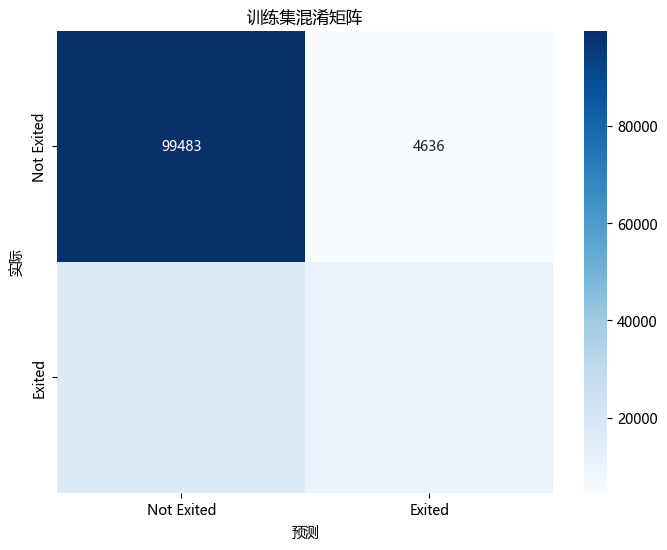

In [11]:
TP, TN, FP, FN = confusion_matrix(train_y, train_predictions)
cm = np.array([[TN, FP], [FN, TP]])

#可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('预测')
plt.ylabel('实际')
plt.title('训练集混淆矩阵')
plt.show()

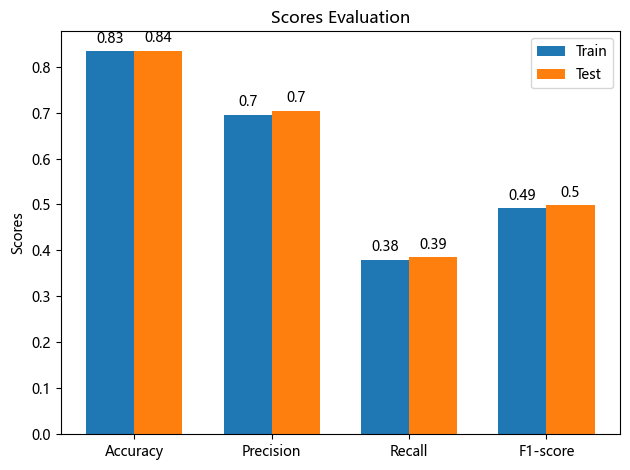

In [12]:
#各项指标
accuracy_train = accuracy_score(train_y, train_predictions)
precision_train = precision_score(train_y, train_predictions)
recall_train = recall_score(train_y, train_predictions)
f1_train = f1_score(train_y, train_predictions)

accuracy_test0 = accuracy_score(test0_y, test0_predictions)
precision_test0 = precision_score(test0_y, test0_predictions)
recall_test0 = recall_score(test0_y, test0_predictions)
f1_test0 = f1_score(test0_y, test0_predictions)

#可视化评估指标
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_metrics = [accuracy_train, precision_train, recall_train, f1_train]
test0_metrics = [accuracy_test0, precision_test0, recall_test0, f1_test0]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_metrics, width, label='Train')
rects2 = ax.bar(x + width/2, test0_metrics, width, label='Test')

ax.set_ylabel('Scores')
ax.set_title('Scores Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [13]:
#计算TPR和FPR
def roc_curve(y_true, y_prob):
    thresholds = np.sort(np.unique(y_prob))[::-1]
    tpr = []
    fpr = []
    for threshold in thresholds:
        y_pred = y_prob >= threshold
        TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
        tpr.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
        fpr.append(FP / (FP + TN) if (FP + TN) > 0 else 0)
    return np.array(fpr), np.array(tpr), thresholds

#计算AUC
def auc(fpr, tpr):
    return np.trapz(tpr, fpr)

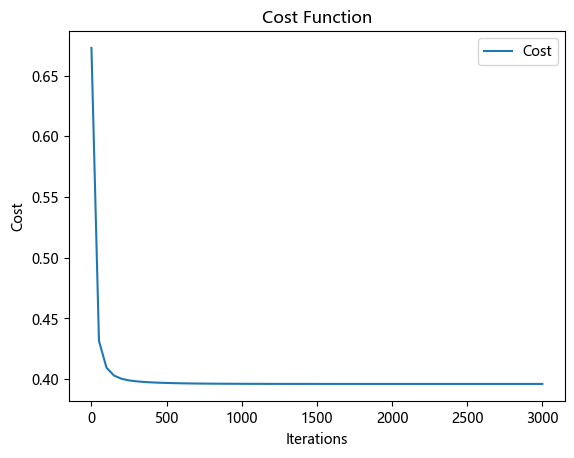

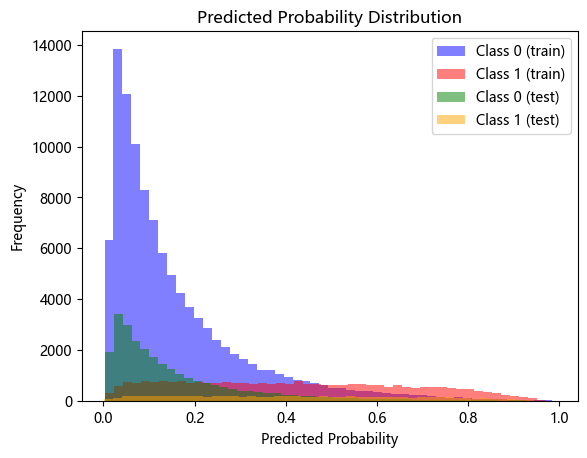

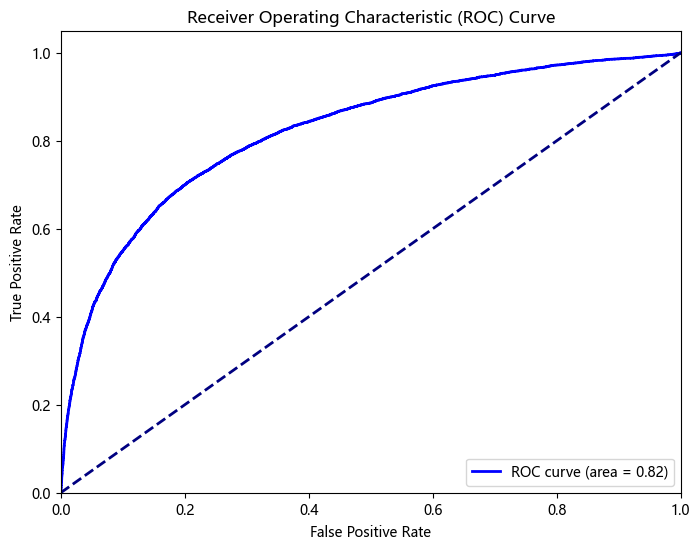

In [14]:
#可视化训练过程中的损失函数值变化
plt.figure()
plt.plot(range(0, num_iterations, 50), cost_history, label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.legend()
plt.show()

#可视化预测概率分布
plt.figure()
plt.hist(train_prob[train_y == 0], bins=50, alpha=0.5, label='Class 0 (train)', color='blue')
plt.hist(train_prob[train_y == 1], bins=50, alpha=0.5, label='Class 1 (train)', color='red')
plt.hist(test0_prob[test0_y == 0], bins=50, alpha=0.5, label='Class 0 (test)', color='green')
plt.hist(test0_prob[test0_y == 1], bins=50, alpha=0.5, label='Class 1 (test)', color='orange')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.legend()
plt.show()


z_test = test0_x.dot(w)
y_prob = sigmoid(z_test)

#计算 ROC曲线和 AUC 值
fpr, tpr, thresholds = roc_curve(test0_y, y_prob)
roc_auc = auc(fpr, tpr)

#绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
test_data_path = 'test.csv'
submission_data_path = 'sample_submission.csv'

#加载测试数据
test = pd.read_csv(test_data_path)
print("Test DataFrame:")
print(test.head())

#加载提交数据
submission_df = pd.read_csv(submission_data_path)
print("Sample Submission DataFrame:")
print(submission_df.head())

Test DataFrame:
       id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00  
Sample Submission DataFrame:
       id    Exited
0  1

In [16]:
#数据预处理
#分类特征和数值特征
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
#缺失值填补
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessed_test = preprocessor.fit_transform(test)

#将预处理后的数据转换为 DataFrame
num_features_names = numerical_features
cat_features_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features_names = np.concatenate([num_features_names, cat_features_names])
preprocessed_test_df = pd.DataFrame(preprocessed_test, columns=all_features_names)

#查看数据结构
preprocessed_test_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.878176,-1.706504,-1.067887,-0.881274,0.820030,-1.746219,1.009580,0.967874,1.0,0.0,0.0,1.0,0.0
1,0.329567,0.888990,-1.067887,-0.881274,-1.015806,0.572666,-0.990511,-0.790939,1.0,0.0,0.0,1.0,0.0
2,-0.006609,-0.465181,0.713922,-0.881274,0.820030,0.572666,-0.990511,0.528413,1.0,0.0,0.0,1.0,0.0
3,0.304665,-0.239486,1.070284,-0.881274,-1.015806,0.572666,-0.990511,0.032150,1.0,0.0,0.0,0.0,1.0
4,1.188684,-0.013791,1.783008,1.050038,-1.015806,0.572666,-0.990511,0.539331,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,-1.077392,-1.029419,0.713922,0.967796,-1.015806,0.572666,1.009580,0.711510,0.0,0.0,1.0,0.0,1.0
110019,-1.015137,-0.239486,-0.355164,1.954171,-1.015806,0.572666,1.009580,-1.394946,1.0,0.0,0.0,1.0,0.0
110020,0.690645,-0.803724,-1.067887,-0.881274,0.820030,0.572666,-0.990511,-1.909981,1.0,0.0,0.0,0.0,1.0
110021,0.653292,-0.690876,-0.711526,-0.881274,-1.015806,0.572666,1.009580,0.924908,1.0,0.0,0.0,1.0,0.0


In [17]:
preprocessed_test_df = np.hstack((np.ones((preprocessed_test_df.shape[0], 1)), preprocessed_test_df))
test_prob = predict_prob(preprocessed_test_df, w)

In [18]:
submission_df['Exited'] = test_prob

#将结果保存到sample_submission.csv
submission_df.to_csv('sample_submission.csv', index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv


In [19]:
class KNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [20]:
#训练KNN模型
knn = KNNClassifier(n_neighbors=5)
knn.fit(test0_x, test0_y)

df_xfirst_1000 = test0_x[:1000]
df_yfirst_1000 = test0_y[:1000]
#预测
y_pred = knn.predict(df_xfirst_1000)

In [21]:
y_knn_accuracy = np.mean(y_pred == df_yfirst_1000)
print(f'KNN Test Accuracy: {y_knn_accuracy}')

KNN Test Accuracy: 0.877


In [22]:
#计时结束
end_time = time.perf_counter()
duration_time = end_time - start_time

print(f"Duration time: {duration_time} seconds")

Duration time: 123.47217850000015 seconds


In [24]:
try:
    !jupyter nbconvert --to python bank_churn.ipynb
    # python即转化为.py，script即转化为.html
    # filename替换为要转换的文件名
except:
    pass

[NbConvertApp] Converting notebook bank_churn.ipynb to python
[NbConvertApp] Writing 11511 bytes to bank_churn.py
